In [1]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np


# allow plots to appear directly in the notebook
%matplotlib inline

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The adverstising dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.

        TV - Spend on TV Advertisements
        Radio - Spend on radio Advertisements
        Newspaper - Spend on newspaper Advertisements
        Sales - Sales revenue generated
        
What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [2]:
url = 'C://Users//t.shah//Desktop//TanujGit//MachineLearning//LinearRegression//Data//Advertising.csv'

data = pd.read_csv(url, index_col=0)
data.head()

,TV,radio,newspaper,sales
sno,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.shape

(200, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [7]:
data.describe(include= 'all')

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Questions About the Advertising Data

Lets pretend that you work for company. The compnay may ask you the follwing: on the basis of this data, how should we spend our advertising money in the future? The below genral question.

    Is there a relationship between ads and sales?
    How strong is that relationship?
    Which ad types contribute to sales?
    What is the effect of each ad type of sales?
    Given ad spending in a particular market, can sales be predicted?



# Assumptions- I #
### There a relationship between sales and ( newspaper, radio, and TV) channels? There Should be liner relationship between dependent variable and independent variable

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


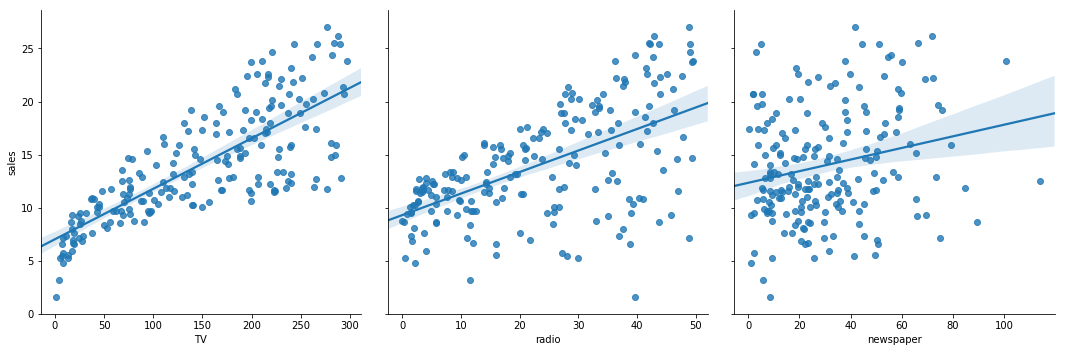

In [8]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=5, aspect=1, kind='reg')

# Assumptions- II Target varaibles should be normally distributed 

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


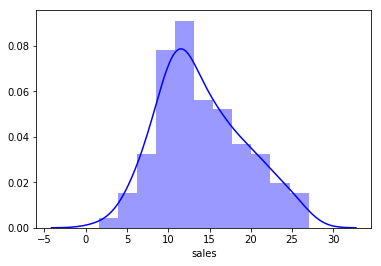

In [9]:
sns.distplot(data.sales, color="b")

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


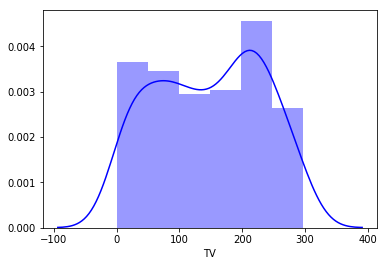

In [10]:
sns.distplot(data.TV, color="b")

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


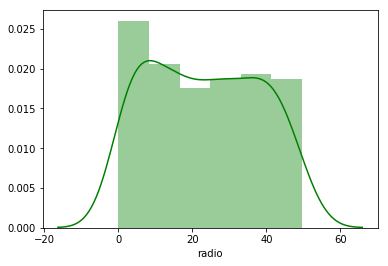

In [11]:
sns.distplot(data.radio, color="g")

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


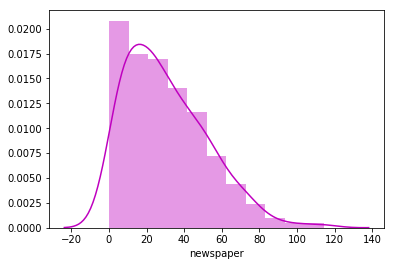

In [12]:
sns.distplot(data.newspaper, color="m")

**Observation** 

        Sales seems to be normal distribution. 
        Spending on newspaper advertisement seems to be right skewed. Most of the spends on newspaper is fairly low.
        Spend on radio and tv seems be uniform distribution. 
        Spends on tv are comparatively higher then spend on radio and newspaper.

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


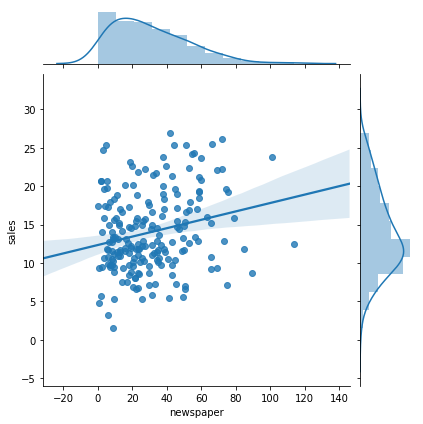

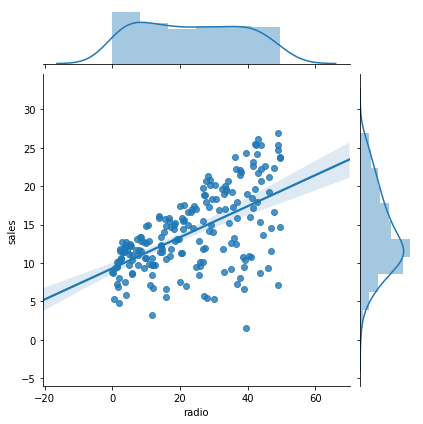

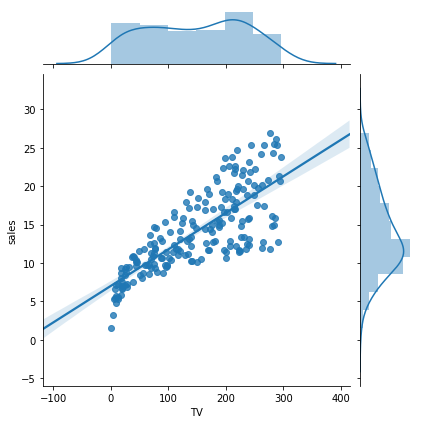

In [14]:
new_sales_joint = sns.jointplot("newspaper", "sales", data=data, kind='reg')
radio_sales_joint = sns.jointplot("radio", "sales", data=data, kind='reg')
tv_sales_joint = sns.jointplot("TV", "sales", data=data, kind='reg')


# Assumptions- III Independent varaibles should not be correlated ( No Multicollinearity)

If I have more than indepdent variable they should not correlated among them self. There should not releation ship between indepdent variable. If there is we will not find a effort one variable to other depdent variable.

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


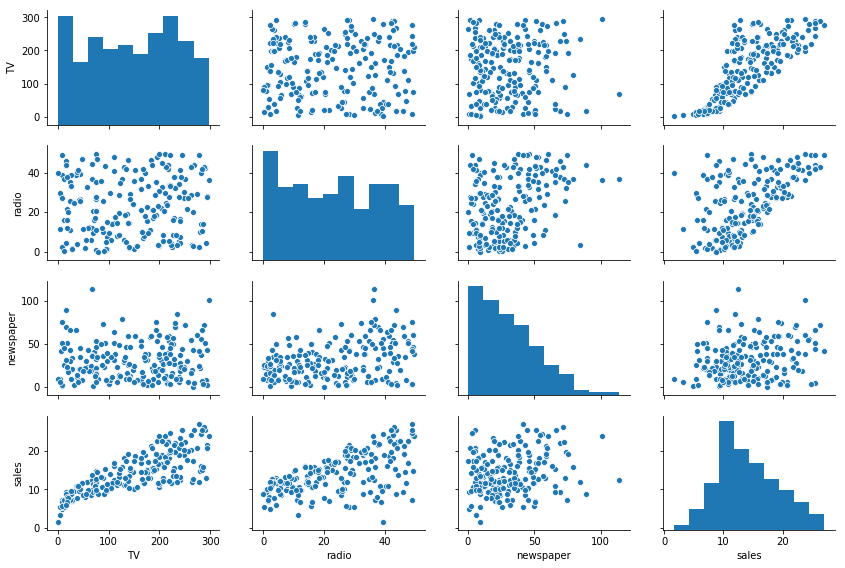

In [15]:
sns.pairplot(data, size = 2, aspect = 1.5)

__Calculating and plotting heatmap correlation__

In [16]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


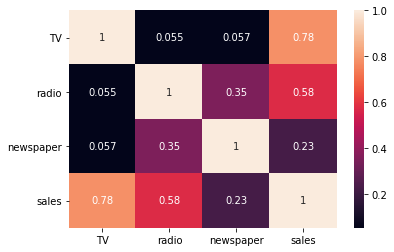

In [17]:
sns.heatmap(data.corr(), annot= True)

### Assumptions of Linear Regression

1. There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.
2. There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.
3. The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.
4. The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.
5. The error terms must be normally distributed.


### Ordinary least squares [OLS]
Ordinary least squares, or linear least squares, estimates the parameters in a regression model by minimizing the sum of the squared residuals. This method draws a line through the data points that minimizes the sum of the squared differences between the observed values and the corresponding fitted values.


### Let's estimate the model coefficients for the advertising data

In [28]:
### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='sales ~ TV', data=data).fit()
# print the coefficients
lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [29]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           1.47e-42
Time:                        08:23:13   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

7.032593549127693
[0.04753664]


### Interpreting Model Coefficients

Interpreting the TV coefficient ( β1 )

- A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales
- Or more clearly: An additional 1,000 spent on TV ads is associated with an increase in sales of 47.537 widgets
- Note here that the coefficients represent associations, not causations

### Using the Model for Prediction
Let's say that there was a new market where the TV advertising spend was $50,000. What would we predict for the Sales in that market?

$$ y = \beta_0 + \beta_1x $$
$$ y = 7.032594 + 0.047537 \times 50 $$

_We would use 50 instead of 50,000 because the original data consists of examples that are divided by 1000_

#### Manual Prediction

In [34]:
7.032594 + 0.047537*150  

14.163143999999999

#### Statsmodels Prediction

In [35]:
### STATSMODELS ###

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [150]})

# predict for a new observation
lm1.predict(X_new)

0    14.16309
dtype: float64

#### Scikit-learn Prediction

In [36]:
# predict for a new observation
lm2.predict(150)

array([14.16308961])

Whenever we discuss model prediction, it’s important to understand prediction errors (bias and variance). There is a tradeoff between a model’s ability to minimize bias and variance. Gaining a proper understanding of these errors would help us not only to build accurate models but also to avoid the mistake of overfitting and underfitting

__What is bias?__
Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.

__What is variance?__
Variance is the variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data.

In supervised learning, underfitting happens when a model unable to capture the underlying pattern of the data. These models usually have high bias and low variance. It happens when we have very less amount of data to build an accurate model or when we try to build a linear model with a nonlinear data. Also, these kind of models are very simple to capture the complex patterns in data like Linear and logistic regression.

In supervised learning, overfitting happens when our model captures the noise along with the underlying pattern in data. It happens when we train our model a lot over noisy dataset. These models have low bias and high variance. These models are very complex like Decision trees which are prone to overfitting.

![image.png](image/Bias-variance.png)

## Confidence in our Model

__Question:__ Is linear regression a high variance/low bias model, or a low variance/high bias model?<br>
__Answer:__

    Low variance/high bias
    Under repeated sampling, the line will stay roughly in the same place (low variance)
        - But the average of those models won't do a great job capturing the true relationship (high bias)
    Note that low variance is a useful characteristic when you don't have a lot of training data
A closely related concept is confidence intervals

    Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows:
        If the population from which this sample was drawn was sampled 100 times
        - Approximately 95 of those confidence intervals would contain the "true" coefficient

In [37]:
# print the confidence intervals for the model coefficients
lm1.conf_int() # Returns the confidence interval of the fitted parameters. The confidence interval is based on Student’s t-distribution.

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [38]:
  # Get the confidence interval for the model (and rename the columns to something a bit more useful)
lm1.conf_int().rename(columns={0: 'lower', 1: 'upper'})

,lower,upper
Intercept,6.129719,7.935468
TV,0.042231,0.052843


    1) We only have a single sample of data, and not the entire population of data
    2) The "true" coefficient is either within this interval or it isn't, but there's no way to actually know
    3) We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is probably within
Note that using 95% confidence intervals is just a convention

    1) You can create 90% confidence intervals (which will be more narrow)
    2) 99% confidence intervals (which will be wider)
    3) or whatever intervals you like.
    
## Hypothesis Testing and p-values

__Examples::__

Spedding Tickets are given more often to red cars then they are to Blue cars. And let's say the average result natinally show a 2:1 prefrerence for red cars i.e Red cars are given more tickets then blue cars.
This Spedding tickets use case study has been done on country level.

And we need to see that for our city also same trend or different trend ?
Now Think on this point.
Whether analysis done on country level and same analysis we are going to perform on city level. That means main experimental variable are going to change country to city level.
This one is natural Hypothesis  that if experimental variable country to city then result will change . So this Hypothesis  called as __null Hypothesis __.

__Null Hypothesis :__  This is the Hypothesis  that the experimental variables you manipulate affects the result you observed.

If this Hypothesis  are correct or not to decide we calculate __p-value__

![image.png](image/p-value.png)

#### Importance and Calculation of P Value

__Null Hypothesis :__ <br>
1) Null Hypothesis states that nothing new is happening, the old theory is true.<br>
2) For regresstion, it simply means there is no releation between dependent variable and indepedndent variables.<br>

__P Value :__
1)  P value is used int Hypothesis testing to help you support or reject the null Hypothesis.<br>
2) P-Value is an evidence against Hypothesis.<br>
3) Smaller the value, stronger evidence to reject Hypothesis.<br>

__If p-Value is < 0.05, reject the null Hypothesis.__
__If p-Value is > 0.05, do not reject the null Hypothesis.__



__Conventional hypothesis test__

- null hypothesis:
        There is no relationship between TV ads and Sales
            β1  equals zero
- alternative hypothesis:
        There is a relationship between TV ads and Sales
            β1  is not equal to zero

__Testing hypothesis__

- Reject the null
        There is a relationship
            If the 95% confidence interval does not include zero
- Fail to reject the null
        There is no relationship
            If the 95% confidence interval includes zero

In [39]:
# print the p-values for the model coefficients
lm1.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

__p-value__

- Represents the probability that the coefficient is actually zero

__Interpreting p-values__

- If the 95% confidence interval does not include zero
    - p-value will be less than 0.05
    - Reject the null
    - There is a relationship
- If the 95% confidence interval includes zero
    - p-value for that coefficient will be greater than 0.05
    - Fail to reject the null
    - There is no relationship

__Notes__

- p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response
- In this case, the p-value for TV is far less than 0.05
    - Low probability coefficient actually zero
    - Reject null hypothesis
    - There is a relationship
    - Believe that there is a relationship between TV ads and Sales
- We generally ignore the p-value for the intercept.

### How Well Does the Model Fit the data?

To evaluate the overall fit of a linear model, we use the R-squared value

- R-squared is the proportion of variance explained
    - It is the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model
        - The null model just predicts the mean of the observed response, and thus it has an intercept and no slope
- R-squared is between 0 and 1
    - __Higher values are better because it means that more variance is explained by the model.__

In [40]:
# print the R-squared value for the model
lm1.rsquared

0.611875050850071

In [41]:
### SCIKIT-LEARN ###

# print the R-squared value for the model
lm2.score(X, y)

0.611875050850071

Is that a "good" R-squared value?

- It's hard to say
- The threshold for a good R-squared value depends widely on the domain
- Therefore, it's most useful as a tool for comparing different models

### Multiple Linear Regression

$$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$$

In [47]:
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()

# print the coefficients
lm1.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [17]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [18]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm2.coef_))

[('TV', 0.04576464545539761),
 ('radio', 0.18853001691820462),
 ('newspaper', -0.0010374930424762972)]

__Interpreting coefficients__

- For a given amount of Radio and Newspaper ad spending, an increase of $1000 in TV ad spending is associated with an increase in Sales of 45.765 widgets.

A lot of the information we have been reviewing piece-by-piece is available in the Statsmodels model summary output:

In [19]:
### STATSMODELS ###

# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 26 Jun 2019   Prob (F-statistic):           1.58e-96
Time:                        06:57:55   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__What are a few key things we learn from this output?__

- TV and Radio have small p-values, whereas Newspaper have a large p-value
    - Reject the null hypothesis for TV and Radio
        - There is association between features and Sales
    - Fail to reject the null hypothesis for Newspaper
        - There is no association
- TV and Radio ad spending are both positively associated with Sales
    - Newspaper ad spending is slightly negatively associated with Sales
        - However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper
- This model has a higher R-squared (0.897) than the previous model
    - This model provides a better fit to the data than a model that only includes TV

__Feature Selection__
Deciding which features to include in a linear model

- Try different models
- Keep features in the model if they have small p-values
    - Reject null hypothesis
    - Relationship exists
- Check whether the R-squared value goes up when you add new features

__Drawbacks to this approach?__

- Linear models rely upon a lot of assumptions
    - Features being independent
        - If assumptions are violated (which they usually are), R-squared and p-values are less reliable
- Using a p-value cutoff of 0.05 means that if you add 100 features to a model that are pure noise, 5 of them (on average) will still be counted as significant
- R-squared is susceptible to overfitting, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

In [21]:
# only include TV and Radio in the model

# instantiate and fit model
lm1 = smf.ols(formula='sales ~ TV + radio', data=data).fit()

# calculate r-square 
lm1.rsquared

0.8971942610828956

In [24]:
# add Newspaper to the model (which we believe has no association with Sales)
lm1 = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm1.rsquared

0.8972106381789522

__Issure with R-squared__

- R-squared will always increase as you add more features to the model, even if they are unrelated to the response
    - Selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.
    
__Solution__

- Adjusted R-squared
    - Penalizes model complexity (to control for overfitting), but it generally under-penalizes complexity.
    
__Better Solution__

- Train/test split or cross-validation
- More reliable estimate of out-of-sample error
    - Better for choosing which of your models will best generalize to out-of-sample data
- There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models
- Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models

### Model Evaluation Metrics for Regression
For classification problems, we have only used classification accuracy as our evaluation metric. What metrics can we used for regression problems?

__Mean Absolute Error (MAE)__ is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i| $$

__Mean Squared Error (MSE)__ is the mean of the squared errors:

$$ \frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

__Root Mean Squared Error (RMSE)__ is the square root of the mean of the squared errors:

$$ \sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Let's calculate these by hand, to get an intuitive sense for the results:

In [48]:
# define true and predicted response values
y_true = [100, 50, 30, 20]
y_pred = [90, 50, 50, 30]

# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_true, y_pred))
print(metrics.mean_squared_error(y_true, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

10.0
150.0
12.24744871391589


#### Model Evaluation Using Train/Test Split
Let's use train/test split with RMSE to see whether Newspaper should be kept in the model:

In [49]:
# include Newspaper
X = data[['TV', 'radio', 'newspaper']]
y = data.sales

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328955


In [50]:
# exclude Newspaper
X = data[['TV', 'radio']]
y = data.sales

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Instantiate model
lm2 = LinearRegression()

# Fit model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888


## common approach
## Preparing X and y using pandas
__Standardization.__
Standardize features by removing the mean and scaling to unit standard deviation.

In [59]:
# Examples

from sklearn.preprocessing import StandardScaler
import numpy as np

# 4 samples/observations and 2 variables/features
data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print(data)


print()

print(scaled_data)

'''The main idea is to normalize/standardize (mean = 0 and standard deviation = 1)
your features before applying machine learning techniques. 
StandardScaler() will normalize the features (each column of X, INDIVIDUALLY !!!) so that each column/feature/variable
will have mean = 0 and standard deviation = 1.'''



[[0 0]
 [1 0]
 [0 1]
 [1 1]]

[[-1. -1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1.  1.]]


C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


'The main idea is to normalize/standardize (mean = 0 and standard deviation = 1)\nyour features before applying machine learning techniques. \nStandardScaler() will normalize the features (each column of X, INDIVIDUALLY !!!) so that each column/feature/variable\nwill have mean = 0 and standard deviation = 1.'

In [60]:
# Verify that the mean of each feature (column) is 0:
scaled_data.mean(axis = 0)

array([0., 0.])

In [61]:
scaled_data.std(axis = 0)

array([1., 1.])

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
data1 = scaler.transform(data)
data = pd.DataFrame(data1)
data.head()

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,0,1
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


In [64]:
feature_cols = ['TV', 'radio', 'newspaper']                # create a Python list of feature names
X = data[feature_cols] # # use the list to select a subset of the original DataFrame-+
print(type(X))
print(X.shape)
y = data.sales
y.head()


KeyError: "None of [Index(['TV', 'radio', 'newspaper'], dtype='object')] are in the [columns]"

In [65]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


### Splitting X and y into training and test datasets.


In [66]:
from sklearn.cross_validation import train_test_split

def split(X, y ) :
    return train_test_split(X, y , test_size =0.20 , random_state = 1)

X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (160, 2)
y_train shape:  (160,)

Test cases as below
X_test shape:  (40, 2)
y_test shape:  (40,)


__Apply any machine learning algorithm on your dataset, basically there are 4 steps:__
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating Root mean square error 
The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    linreg.fit(X_train, y_train) 
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))```

In [46]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

In [47]:
X = data[feature_cols]  
y = data.sales
linreg = linear_reg(X,y)

In [48]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: 2.793997868845956
Coefficients: [ 0.0466117   0.17830244  0.00259291  0.21833925 -0.1349782   0.25744959]


__Its hard to remember the order of the feature names, we so we are zipping the features to pair the feature names with the coefficients__

In [89]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()   
coef.insert(0, linreg.intercept_)
print(coef)
print(feature_cols)

[0.001162087460638478, 0.77081213791251, 0.50806629027561, 0.010795215187608894]
['Intercept', 'TV', 'radio', 'newspaper']


In [90]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 0.001162087460638478
TV 0.77081213791251
radio 0.50806629027561
newspaper 0.010795215187608894


__y = 0.00116 + 0.7708 `*` TV + 0.508 `*` radio + 0.010 `*` newspaper__

How do we interpret the TV coefficient (_0.77081_)
- A "unit" increase in TV ad spending is **associated with** a _"0.7708_ unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 770.8 widgets.

Important Notes:
- This is a statement of __association__, not __causation__.
- If an increase in TV ad spending was associated with a __decrease__ in sales,  β1  would be __negative.__


__Using the Model for Prediction__

In [93]:
y_pred_train = linreg.predict(X_train)  
y_pred_test = linreg.predict(X_test)     # make predictions on the testing set
# We need an evaluation metric in order to compare our predictions with the actual values.

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Computing the MAE for our Sales predictions

In [102]:
from sklearn import metrics
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.2553322418777194
MAE for test set is 0.1998724319969636


__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Computing the MSE for our Sales predictions

In [103]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.1113807557032536
MSE for test set is 0.07353999839228291


__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Sales predictions

In [104]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.3337375551286573
RMSE for test set is 0.2711825923474494


# Model Evaluation using Rsquared value.
- There is one more method to evaluate linear regression model and that is by using the __Rsquared__ value.<br/>
- R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

- R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. But there is one shortcoming of Rsquare method and that is **R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting).

In [105]:
yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8959372632325174 0.8939360567562197


In [106]:
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8927605914615386 0.8838239740833336


## Feature Selection

At times some features do not contribute much to the accuracy of the model, in that case its better to discard those features.<br/> 
- Let's check whether __"newspaper"__ improve the quality of our predictions or not.<br/> 
To check this we are going to take all the features other than "newspaper" and see if the error (RMSE) is reducing or not.
- Also Applying __Gridsearch__ method for exhaustive search over specified parameter values of  estimator.

In [112]:
feature_cols = ['TV','radio']                                                          # create a Python list of feature names
X = data[feature_cols]  
y = data.sales
linreg=linear_reg(X,y,'True')

Mean cross-validated score of the best_estimator :  0.885792093530779
RMSE for the test set is 0.07218638347382718


- _Before_ doing feature selection _RMSE_ for the test dataset was __0.271__.<br/>
- _After_ discarding 'newspaper' column, RMSE comes to be __0.072__.<br/>
As you can see there is __significant improvement__ in the quality, therefore, the 'newspaper' column should be discarded. But if in some other case if there is no significant decrease in the RMSE, then you must keep that feature.

## Handling Categorical Features with Two Categories

Up to now, all of our features have been numeric. What if one of our features was categorical?
Let's create a new feature called Size, and randomly assign observations to be small or large:

In [33]:
# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'

# Series.loc is a purely label-location based indexer for selection by label
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,radio,newspaper,sales,Area,Size
sno,,,,,,
1,230.1,37.8,69.2,22.1,rural,large
2,44.5,39.3,45.1,10.4,urban,small
3,17.2,45.9,69.3,9.3,rural,small
4,151.5,41.3,58.5,18.5,urban,small
5,180.8,10.8,58.4,12.9,suburban,large


For scikit-learn, we need to represent all data numerically

- If the feature only has two categories, we can simply create a dummy variable that represents the categories as a binary value:


In [34]:
# create a new Series called Size_large
data['Size_large'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,radio,newspaper,sales,Area,Size,Size_large
sno,,,,,,,
1,230.1,37.8,69.2,22.1,rural,large,1
2,44.5,39.3,45.1,10.4,urban,small,0
3,17.2,45.9,69.3,9.3,rural,small,0
4,151.5,41.3,58.5,18.5,urban,small,0
5,180.8,10.8,58.4,12.9,suburban,large,1


__Let''s redo the multiple linear regression and include the Size_large feature:__

In [35]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'Size_large']
X = data[feature_cols]
y = data.sales

# instantiate
lm2 = LinearRegression()
# fit
lm2.fit(X, y)

# print coefficients
list(zip(feature_cols, lm2.coef_))

[('TV', 0.045719820924362775),
 ('radio', 0.1887281431342787),
 ('newspaper', -0.0010976794483516079),
 ('Size_large', 0.0574238508548277)]

Interpreting the Size_large coefficient

- For a given amount of TV/Radio/Newspaper ad spending, being a large market is associated with an average __increase__ in Sales of 57.42 widgets (as compared to a small market, which is called the baseline level).
- What if we had reversed the 0/1 coding and created the feature 'Size_small' instead?
    - The coefficient would be the same, except it would be __negative instead of positive__
    - As such, your choice of category for the baseline does not matter, all that changes is your __interpretation__ of the coefficient


# Handling Categorical Features with More than Two Categories
Let's create a new feature called Area, and randomly assign observations to be rural, suburban, or urban :

In [36]:
np.random.seed(123456)                                                # set a seed for reproducibility
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)                         # assign roughly one third of observations to each group
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,radio,newspaper,sales,Area,Size,Size_large
sno,,,,,,,
1,230.1,37.8,69.2,22.1,rural,large,1
2,44.5,39.3,45.1,10.4,urban,small,0
3,17.2,45.9,69.3,9.3,rural,small,0
4,151.5,41.3,58.5,18.5,urban,small,0
5,180.8,10.8,58.4,12.9,suburban,large,1


We want to represent Area numerically, but we can't simply code it as:<br/>
- 0 = rural,<br/>
- 1 = suburban,<br/>
- 2 = urban<br/>
Because that would imply an **ordered relationship** between suburban and urban, and thus urban is somehow "twice" the suburban category.<br/> Note that if you do have ordered categories (i.e., strongly disagree, disagree, neutral, agree, strongly agree), you can use a single dummy variable to represent the categories numerically (such as 1, 2, 3, 4, 5).<br/>

Anyway, our Area feature is unordered, so we have to create **additional dummy variables**. Let's explore how to do this using pandas:

In [37]:
area_dummies = pd.get_dummies(data.Area, prefix='Area')                           # create three dummy variables using get_dummies
area_dummies.head()

,Area_rural,Area_suburban,Area_urban
sno,,,
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,1,0


Here is how we interpret the coding:
- **rural** is coded as  Area_suburban = 0  and  Area_urban = 0
- **suburban** is coded as  Area_suburban = 1  and  Area_urban = 0
- **urban** is coded as  Area_suburban = 0  and  Area_urban = 1

If this sounds confusing, think in general terms that why we need only __k-1 dummy variables__ if we have a categorical feature with __k "levels"__.

Anyway, let's add these two new dummy variables onto the original DataFrame, and then include them in the linear regression model.

In [38]:
# concatenate the dummy variable columns onto the DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,radio,newspaper,sales,Area,Size,Size_large,Area_rural,Area_suburban,Area_urban
sno,,,,,,,,,,
1,230.1,37.8,69.2,22.1,rural,large,1,1,0,0
2,44.5,39.3,45.1,10.4,urban,small,0,0,0,1
3,17.2,45.9,69.3,9.3,rural,small,0,1,0,0
4,151.5,41.3,58.5,18.5,urban,small,0,0,0,1
5,180.8,10.8,58.4,12.9,suburban,large,1,0,1,0


In [120]:
feature_cols = ['TV', 'radio', 'newspaper', 'Area_suburban', 'Area_urban']             # create a Python list of feature names
X = data[feature_cols]  
y = data.sales
linreg = linear_reg(X,y)

In [42]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'Size_large', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
list(zip(feature_cols, lm2.coef_))

[('TV', 0.04574401036331375),
 ('radio', 0.18786669552525811),
 ('newspaper', -0.0010876977267108138),
 ('Size_large', 0.07739660749747909),
 ('Area_suburban', -0.10656299015958638),
 ('Area_urban', 0.26813802165220063)]

__How do we interpret the coefficients?__

- Holding all other variables fixed, being a suburban area is associated with an average decrease in Sales of 106.56 widgets (as compared to the baseline level, which is rural).
- Being an urban area is associated with an average increase in Sales of 268.13 widgets (as compared to rural).

In [39]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)

eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

NameError: name 'linreg' is not defined

__y = - 0.00218 + 0.7691 `*` TV + 0.505 `*` radio + 0.011 `*` newspaper - 0.0311 `*` Area_suburban + 0.0418 `*` Area_urban__<br/>
How do we interpret the coefficients?<br/>
- Holding all other variables fixed, being a **suburban** area is associated with an average **decrease** in Sales of 0.0311 widgets (as compared to the baseline level, which is rural).
- Being an **urban** area is associated with an average **increase** in Sales of 0.0418 widgets (as compared to rural).

###### Refrence for more method (api ) https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html
